## Analysis Questions
 What features/columns had a relatively even or normal distribution? Which features/columns did not?
 - The 'ratings' column had a relatively normal distribution while the 'episodes' and 'members' columns were both heavily skewed to the right.

 How did you handle missing values? Why did you do this method as opposed to others?
 - Because my dataset was fairly large I was able to drop observations that contained na values. I started with 12,294 observations and was left with 11,379 after removal. The amount removed from the data only made up 7.5% of the data leaving me with enough observations for training and testing. I decided that the removal of these observations was acceptable being less than 10% of my data set.

 How did you encode your categorical data? Why did you do this method as opposed to others?
 - I one hot encoded both the 'genre' feature and the 'type' feature. These categorical columns had no ordinal value that needed to be specifically assigned so One Hot encoding was the correct encoding technique to use. One hot encoding allows us to assign numerical representation to the categorical variables without encoding a hierarchy.
 
 How did you handle removing outliers? Why did you use this method as opposed to others?
 - I remove outliers using the IQR method. I chose this method because IQR is useful when working with skewed distributions. The IQR method takes these distributions into account when removing outliers. IQR is less sensitive to extreme values, which 'members' and 'episodes' contained, than the likes of the z score method which is not as robust when faced with extreme values.

 How did you normalize/standardize the data? Why did you use this method as opposed to others?
 - I used standardization to scale my data. I chose standardization because I have features that are normally distributed as well as features that are skewed (not normally distributed). Because I have a mixed bag, I chose standardization to ensure that the features which were not normally distributed were scaled appropriately.
 
 How did each model perform? Which performed the best?
 - My neural network performed the best with an R^2 of .34, a MAE of .58 and a MSE of .65. My SVM and my linear regression models preformed worse than the neural network but not as bad as my decision tree which had a negative R^2.

 Did any models seem to have a relatively high amount of bias (under-fitting)? Variance (over-fitting)?
 - Each of my models can be seen to suffer from bias/under-fitting shown by low R^2 scores. We interpret this as the model not being able to capture the variance of the target variable with the variance of the features provided. The model that suffers from the most bias is the decision tree which has a negative R^2. This is a result of under-fitting and makes sense in the context of a decision tree which branches from feature to feature to make predictions. The overall lack of features in this data set can be linked to the relatively low R^2 scores. In order to provide better predictions on the rating of anime, I recommend that the company gathers more data that can be used to train predictive models. Some feature that could be useful include the platform on which the anime is watched, the age of the members associated with the anime, the cost of production, etc. These feature would allow us to capture more of the variance in our target variable and create a more robust model.

In [1]:
##Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

rawDF = pd.read_csv("anime.csv")
rawDF.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
rawDF.shape

(12294, 7)

In [3]:
##describe dataset
rawDF.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [4]:
## create list for easy access while preprocessing
num = ["rating", "members", "episodes"]
cat = ["genre", "type"]

In [5]:
## drop the anime_id column, not important for modeling
rawDF = rawDF.drop("anime_id", axis = 1)
rawDF = rawDF.drop("name", axis = 1)
rawDF.head()

,genre,type,episodes,rating,members
0,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,"Sci-Fi, Thriller",TV,24,9.17,673572
4,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
## found that episodes were a mix of strings and ints, only want numeric so dropped strings
rawDF['episodes'] = pd.to_numeric(rawDF['episodes'], errors='coerce')
rawDF = rawDF.dropna()

In [7]:
## minimized genre to the first thing in the list of genres
rawDF['genre'] = rawDF['genre'].str.split(',').str[0]
rawDF.head()

,genre,type,episodes,rating,members
0,Drama,Movie,1.0,9.37,200630
1,Action,TV,64.0,9.26,793665
2,Action,TV,51.0,9.25,114262
3,Sci-Fi,TV,24.0,9.17,673572
4,Action,TV,51.0,9.16,151266


Since the amount of rows with na values is only 2.2% of the data, I am ok with dropping these rows from the dataset

In [8]:
##check againg for na values
rawDF.isna().sum()

genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [9]:
## na value paranoia
cleanDF = rawDF.dropna()
cleanDF.shape

(11830, 5)

In [10]:
# Check the data types of every column in the DataFrame
data_types = cleanDF.dtypes
data_types


genre        object
type         object
episodes    float64
rating      float64
members       int64
dtype: object

## Explore numerical features

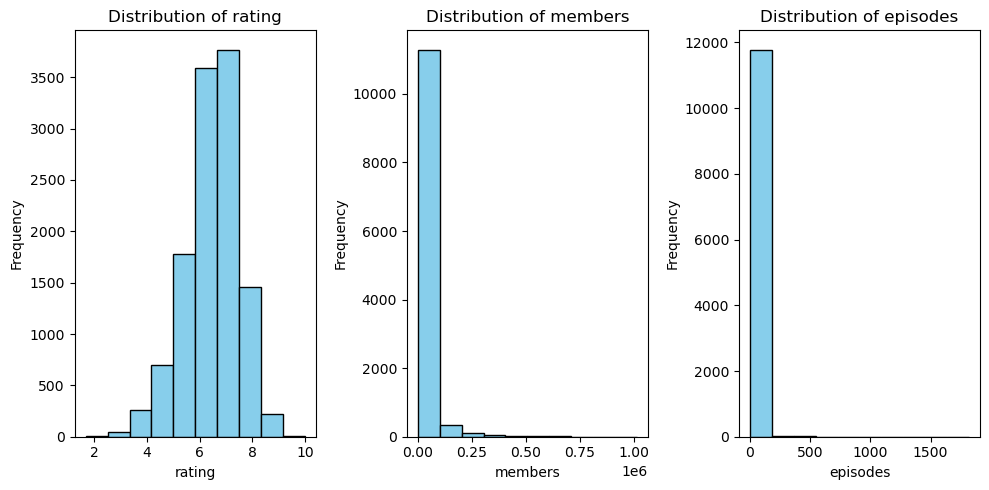

In [11]:
## distributions of numerical features
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs = axs.flatten()

for i, col in enumerate(num):
    axs[i].hist(cleanDF[col], bins=10, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Distribution of ' + col)

plt.tight_layout()

## Explore categorical variables

Text(0.5, 1.0, 'Count of Types in our Data')

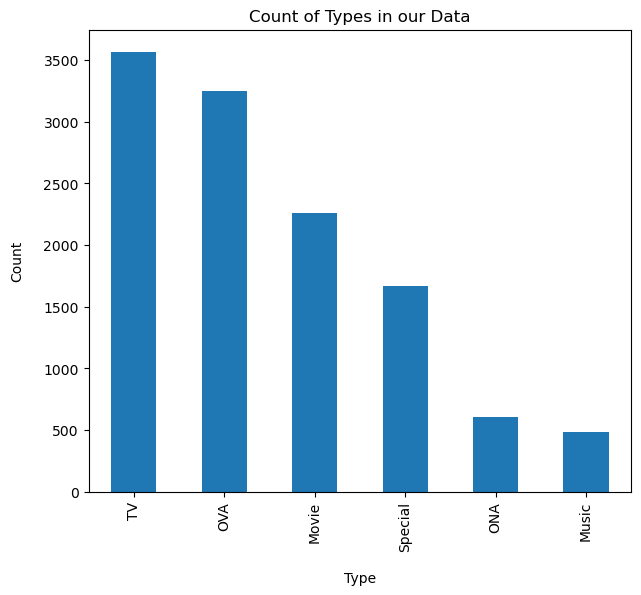

In [12]:
##bar charts of the count of categorical values
cleanDF['type'].value_counts().plot(kind='bar', figsize=(7, 6))
plt.xlabel("Type", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of Types in our Data")

Text(0.5, 1.0, 'Count of Genres in our Data')

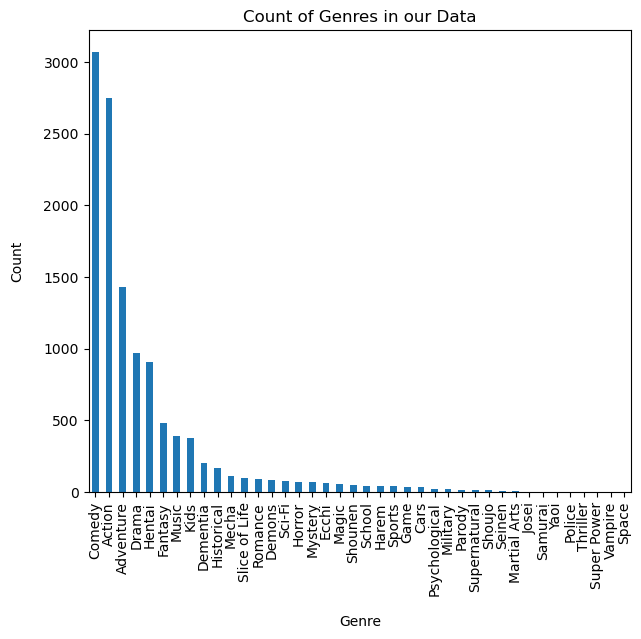

In [13]:
cleanDF['genre'].value_counts().plot(kind='bar', figsize=(7, 6))
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of Genres in our Data")

## Encode Categorical Variables

In [14]:
##Onehot encoding Genre
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(cleanDF[['genre']])

encoder.categories_

c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
        'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai',
        'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts',
        'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police',
        'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
        'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space', 'Sports',
        'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi'],
       dtype=object)]

In [15]:
OHgenreDF = pd.DataFrame(encodedData, columns=encoder.categories_)
OHgenreDF.columns = OHgenreDF.columns.get_level_values(0)

OHgenreDF.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
##Onehot encoding type
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(cleanDF[['type']])

encoder.categories_

c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV'], dtype=object)]

In [17]:
OHtypeDF = pd.DataFrame(encodedData, columns=encoder.categories_)
OHtypeDF.columns = OHtypeDF.columns.get_level_values(0)

OHtypeDF.head()

,Movie,Music,ONA,OVA,Special,TV
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
## combine the data frames and make sure no na values were generated
encodedDF = pd.concat([cleanDF, OHgenreDF, OHtypeDF], axis=1).drop(columns = ["type", "genre"])
encodedDF.isna().sum()
encodedDF = encodedDF.dropna()
encodedDF.tail()

,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Supernatural,Thriller,Vampire,Yaoi,Movie,Music,ONA,OVA,Special,TV
11825,2.0,6.03,1065.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11826,2.0,6.03,2912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11827,2.0,6.02,1771.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11828,2.0,6.02,2503.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11829,2.0,6.02,2971.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
encodedDF.shape

(11379, 49)

## Removing Outliers

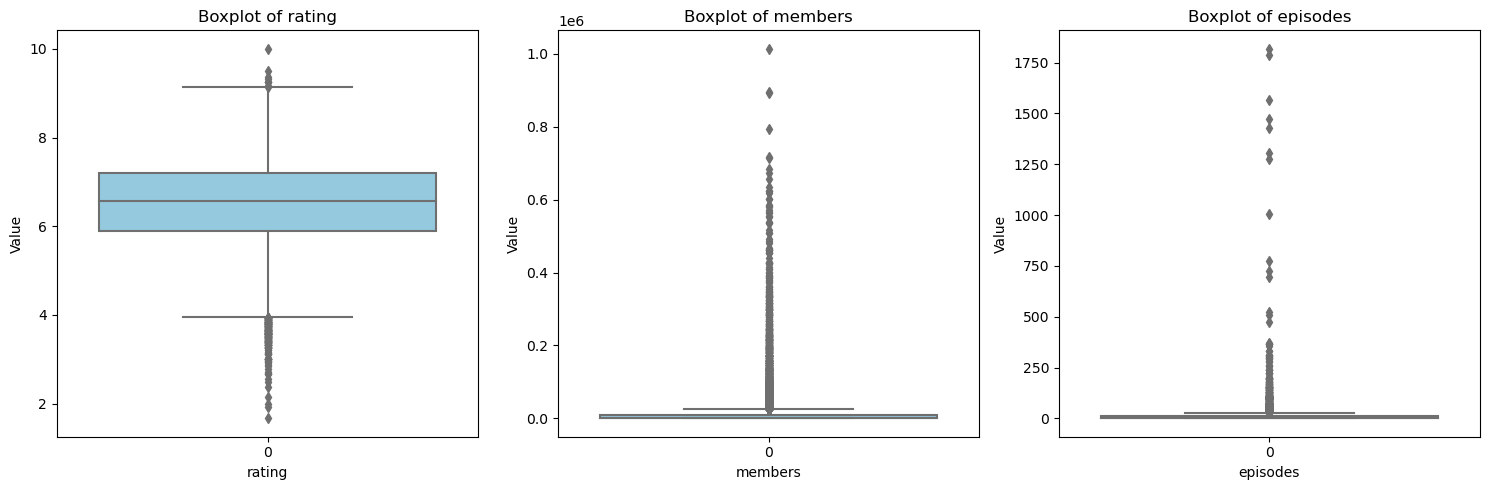

In [20]:
##box plots of numeric features
fig, axs = plt.subplots(1, len(num), figsize=(15, 5))

for i, col in enumerate(num):
    sns.boxplot(data=cleanDF[col], ax=axs[i], color='skyblue')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Value')
    axs[i].set_title('Boxplot of ' + col)

plt.tight_layout()



In [21]:
def rmOutlier(DF, col_name):
    
    Q1 = np.percentile(DF[col_name], 25, method='midpoint')
    Q3 = np.percentile(DF[col_name], 75, method='midpoint')
    IQR = Q3 - Q1

    print(IQR)

    maxThreshold = Q3+1.5*IQR
    minThreshold = Q1-1.5*IQR

    outlierDF = DF[DF[col_name] < maxThreshold]
    outlierDF = outlierDF[outlierDF[col_name] > minThreshold]

    return outlierDF

In [22]:
## remove member outliers
OLmemberDF = rmOutlier(encodedDF, 'members')
OLmemberDF.shape

10557.0


(9634, 49)

In [23]:
## remove episode outliers
OLfilterDF = rmOutlier(OLmemberDF, 'episodes')
OLfilterDF.shape

11.0


(8637, 49)

In [24]:
OLfilterDF.head()

,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,...,Supernatural,Thriller,Vampire,Yaoi,Movie,Music,ONA,OVA,Special,TV
41,2.0,8.69,16947.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63,2.0,8.60,11104.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
81,1.0,8.55,25641.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103,2.0,8.50,13405.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108,25.0,8.49,24788.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Separating dependent and independent features

In [25]:
##reset index
OLfilterDF = OLfilterDF.reset_index().drop(columns="index")

##create feature that we are trying to predict
yDF = pd.DataFrame(OLfilterDF["rating"])

yDF.head()

,rating
0,8.69
1,8.60
2,8.55
3,8.50
4,8.49


In [26]:
xDF = OLfilterDF.drop(columns="rating")

xDF.head()

,episodes,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Supernatural,Thriller,Vampire,Yaoi,Movie,Music,ONA,OVA,Special,TV
0,2.0,16947.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,11104.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,25641.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,13405.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25.0,24788.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
print(xDF.shape)
print(yDF.shape)

(8637, 48)
(8637, 1)


In [28]:
# split training and testing set
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xDF, yDF, test_size = 0.3, shuffle=True)

xTrain.head()

,episodes,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Supernatural,Thriller,Vampire,Yaoi,Movie,Music,ONA,OVA,Special,TV
4829,1.0,171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2465,26.0,15338.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6297,1.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5037,1.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
503,1.0,11368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Feature scaling

In [29]:
##standardization
from sklearn.preprocessing import StandardScaler

Xscaler = StandardScaler()
yscaler = StandardScaler()

colNames = ['episodes', 'members']
xTrain[colNames] = Xscaler.fit_transform(xTrain[colNames])
xTest[colNames] = Xscaler.fit_transform(xTest[colNames])

colNames = yTrain.columns.values.tolist()
yTrain[colNames] = yscaler.fit_transform(yTrain[colNames])
yTest[colNames] = yscaler.fit_transform(yTest[colNames])

# view result
xTrain.head()

,episodes,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Supernatural,Thriller,Vampire,Yaoi,Movie,Music,ONA,OVA,Special,TV
4829,-0.529990,-0.617081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2465,3.074145,2.024092,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6297,-0.529990,-0.630490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5037,-0.529990,-0.585910,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
503,-0.529990,1.332759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Training and model evaluation

In [30]:
## training and evaluation imports
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn import tree

In [31]:
## regression model
regModel = LinearRegression().fit(xTrain, yTrain)

preds = regModel.predict(xTest)

print("R^2 score:")
print(r2_score(yTest, preds))

print("Mean Absolute Error:")
print(mean_absolute_error(yTest, preds))

print("Mean Squared Error:")
print(mean_squared_error(yTest, preds))

R^2 score:
0.2625796188049949
Mean Absolute Error:
0.6350101151503023
Mean Squared Error:
0.7374203811950051


In [32]:
## svm model
svmModel = svm.SVR().fit(xTrain, yTrain)

preds = svmModel.predict(xTest)

print("R^2 score:")
print(r2_score(yTest, preds))

print("Mean Absolute Error:")
print(mean_absolute_error(yTest, preds))

print("Mean Squared Error:")
print(mean_squared_error(yTest, preds))

c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 score:
0.338127969873226
Mean Absolute Error:
0.5854715713177266
Mean Squared Error:
0.661872030126774


In [33]:
## decision tree model
dtModel = tree.DecisionTreeRegressor().fit(xTrain, yTrain)

preds = dtModel.predict(xTest)

print("R^2 score:")
print(r2_score(yTest, preds))

print("Mean Absolute Error:")
print(mean_absolute_error(yTest, preds))

print("Mean Squared Error:")
print(mean_squared_error(yTest, preds))

R^2 score:
-0.16549824053419782
Mean Absolute Error:
0.7929788545676535
Mean Squared Error:
1.1654982405341978


In [34]:
## neural net model
nnModel = MLPRegressor().fit(xTrain, yTrain)

preds = nnModel.predict(xTest)

print("R^2 score:")
print(r2_score(yTest, preds))

print("Mean Absolute Error:")
print(mean_absolute_error(yTest, preds))

print("Mean Squared Error:")
print(mean_squared_error(yTest, preds))

c:\Users\ethan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 score:
0.3475701070682431
Mean Absolute Error:
0.5878624553360926
Mean Squared Error:
0.6524298929317569
